In [1]:
%matplotlib inline
import numpy as np
from nsampling import NestedSampling, Uniform, Normal
from functools import partial

## The Lighthouse Problem

In [2]:
data = [4.73, 0.45, -1.73, 1.09, 2.19, 0.12,
        1.31, 1.00, 1.32, 1.07, 0.86, -0.49, -2.59, 1.73, 2.11,
        1.61, 4.98, 1.71, 2.23, -57.20, 0.96, 1.25, -1.56, 2.45,
        1.19, 2.17, -10.66, 1.91, -4.16, 1.92, 0.10, 1.98, -2.51,
        5.55, -0.47, 1.91, 0.95, -0.78, -0.84, 1.72, -0.01, 1.48,
        2.70, 1.21, 4.41, -4.79, 1.33, 0.81, 0.20, 1.58, 1.29,
        16.19, 2.75, -2.38, -1.79, 6.50, -18.53, 0.72, 0.94, 3.64,
        1.94, -0.11, 1.57, 0.57]

In [3]:
def likelihood(vals, data):
    x = vals[0]
    y = vals[1]
    N = len(data)
    logL = 0
    if y < 0.:
        raise SamplingException()
    for k in range(0, N):
        logL += np.log((y / np.pi) /
                       ((data[k] - x) * (data[k] - x) + y * y))
    return logL

In [12]:
x = Uniform('x', -2., 2.)
y = Uniform('y', 0., 2.)
ns = NestedSampling()
lh = partial(likelihood, data=data)
rs = ns.explore([x, y], 100, 1000, lh, 20, 0.1)

In [14]:
print(rs.getexpt())

[1.2588068177970244, 0.9901754525995566]


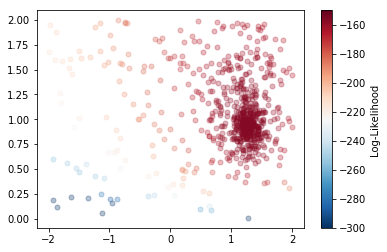

In [6]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
from matplotlib.colors import Normalize
cmap = cm.ScalarMappable(norm=Normalize(vmin=-300, vmax=-150), cmap='RdBu_r')
logLs = []
smp = rs.get_samples()
xs = []
ys = []
for _s in smp:
    cl = cmap.to_rgba(_s.get_logL())
    logLs.append(_s.get_logL())
    x1, y1 = _s.get_value()
    xs.append(x1)
    ys.append(y1)
    plt.plot(x1,y1,ms=5,color=cl,marker='o',alpha=0.3)
cmap.set_array(logLs)
cb = plt.colorbar(cmap)
cb.set_label('Log-Likelihood')

## Himmelblau's function

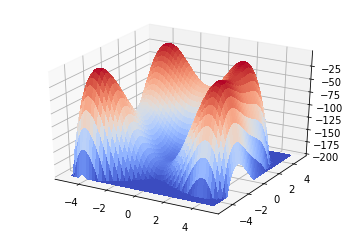

In [7]:
from mpl_toolkits.mplot3d import Axes3D
x = np.linspace(-5.,5.,1000)
y = np.linspace(-5.,5.,1000)
X, Y = np.meshgrid(x, y)
Z = -((X**2 + Y - 11.)**2 + (X + Y**2 -7)**2)
Z = np.where(Z < -200, -200, Z)
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

In [8]:
x_ns = Uniform('x_ns', -5., 5.)
y_ns = Uniform('y_ns', -5., 5.)

def Himmelblau(vals):
    x = vals[0]
    y = vals[1]
    return -((x**2 + y - 11.)**2 + (x + y**2 -7)**2)

In [9]:
ns_hb = NestedSampling()
rs = ns_hb.explore([x_ns, y_ns], 100, 10000, Himmelblau, 20, 0.2)

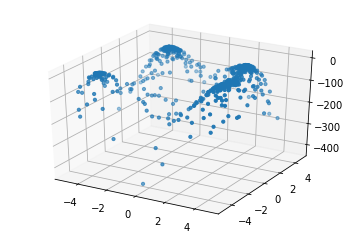

In [10]:
smp = rs.get_samples()
x_rs = []
y_rs = []
z_rs = []
for _s in smp:
    z_rs.append(_s.get_logL())
    x,y = _s.get_value()
    x_rs.append(x)
    y_rs.append(y)
fig1 = plt.figure()
ax1 = fig1.gca(projection='3d')
ax1.scatter(x_rs, y_rs, z_rs, s=10)